In [ ]:
#Importações
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive

drive.mount('/Banco_de_Dados')

Drive already mounted at /Banco_de_Dados; to attempt to forcibly remount, call drive.mount("/Banco_de_Dados", force_remount=True).


# Preparação de Dados:
Agora que ja temos um versão mais reduzida do nosso banco de dados podemos começar a fazer nossa exploração:

# 2017

## Inicialização

In [ ]:
#Selecionado as Colunas que vamos utilizar:
colunas = ['NU_INSCRICAO','TP_COR_RACA','TP_SEXO','SG_UF_RESIDENCIA','Q001','Q002','Q006','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']

dp_Enem2017 = pd.read_csv("/Banco_de_Dados/MyDrive/Iniciação Cientifica/Banco_de_Dados/microdados_enem_2017/DADOS/MICRODADOS_ENEM_2017.csv",sep=";",encoding="ISO-8859-1",usecols=colunas)

In [ ]:
#Memoria do Banco de Dados de 2017
dp_Enem2017.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731341 entries, 0 to 6731340
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   NU_INSCRICAO      int64  
 1   SG_UF_RESIDENCIA  object 
 2   TP_SEXO           object 
 3   TP_COR_RACA       int64  
 4   TP_PRESENCA_CN    float64
 5   TP_PRESENCA_CH    float64
 6   TP_PRESENCA_LC    float64
 7   TP_PRESENCA_MT    float64
 8   NU_NOTA_CN        float64
 9   NU_NOTA_CH        float64
 10  NU_NOTA_LC        float64
 11  NU_NOTA_MT        float64
 12  Q001              object 
 13  Q002              object 
 14  Q006              object 
dtypes: float64(8), int64(2), object(5)
memory usage: 2.3 GB


In [ ]:
#Dicionario para converter os Numeros em Texto
dictraca = {
  0	: "Não declarado",
  1	: "Branca",
  2	: "Preta",
  3	: "Parda",
  4	: "Amarela",
  5	: "Indígena" 
}

#Filtros Genericos
notas = ['NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_CN','NU_NOTA_REDACAO']
presenca = ['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT']

In [ ]:
# Separando o Banco de Dados apenas para os Presentes:
filtro_presente   = ((dp_Enem2017['TP_PRESENCA_CN'] == 1) & (dp_Enem2017['TP_PRESENCA_CH'] == 1) & (dp_Enem2017['TP_PRESENCA_LC'] == 1) & (dp_Enem2017['TP_PRESENCA_MT'] == 1))
enem_2017   = dp_Enem2017.loc[filtro_presente]
enem_2017 = enem_2017.drop(columns=['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT'])
enem_2017 = enem_2017.reset_index()
enem_2017 = enem_2017.drop(columns=['index'])
enem_2017.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q001,Q002,Q006
0,170003336736,SP,F,1,445.4,589.0,621.5,465.5,E,D,D
1,170001663645,SC,F,1,604.0,610.4,563.9,591.2,E,D,D
2,170001663646,AL,M,3,482.1,569.2,570.8,584.6,A,B,C
3,170001663647,RS,F,1,558.8,594.9,522.8,578.5,F,F,J
4,170003334115,PR,M,2,625.9,636.8,588.3,607.5,C,D,D


### Dicionarios:

In [ ]:
#Sexo
dic_Sexo = {
    'F' : 1,
    'M' : 0,
}

In [ ]:
#Salario Equivalente
dic_SalarioMin = {   
    'A'	: 0.0, # "Nenhuma renda.",
    'B'	: 1.0, # "Até R$ 937,00.",
    'C'	: 1.5, # "R$ 0.937,01 - R$ 1.405,50.",
    'D'	: 2.0,# "R$ 1.405,51 - R$ 1.874,00.",
    'E'	: 2.5,# "R$ 1.874,01 - R$ 2.342,50.",
    'F'	: 3.0,# "R$ 2.342,51 - R$ 2.811,00.",
    'G'	: 4.0,# "R$ 2.811,01 - R$ 3.748,00.",
    'H'	: 5.0,# "R$ 3.748,01 - R$ 4.685,00.",
    'I'	: 6.0,# "R$ 4.685,01 - R$ 5.622,00.",
    'J'	: 7.0,# "R$ 5.622,01 - R$ 6.559,00.",
    'K'	: 8.0,# "R$ 6.559,01 - R$ 7.496,00.",
    'L'	: 9.0,# "R$ 7.496,01 - R$ 8.433,00.",
    'M'	: 10.0,# "R$ 8.433,01 - R$ 9.370,00.",
    'N'	: 12.0,# "R$ 9.370,01 - R$ 11.244,00.",
    'O'	: 15.0,# "R$ 11.244,01 - R$ 14.055,00.",
    'P'	: 20.0,# "R$ 14.055,01 - R$ 18.740,00.",
    'Q'	: 24.0,# "Mais de R$ 18.740,00.",
}

In [ ]:
dic_Escolarida_pai = {
    'A'	: "P-Nenhuma",
    'B'	: "P-Sem Fundamental",
    'C'	: "P-Fundamental I",
    'D'	: "P-Fundamental II",
    'E'	: "P-Medio",
    'F'	: "P-Faculdade",
    'G'	: "P-Posgraduação",
    'H'	: "P-Não sei.",
}

dic_Escolarida_mae = {
    'A'	: "M-Nenhuma",
    'B'	: "M-Sem Fundamental",
    'C'	: "M-Fundamental I",
    'D'	: "M-Fundamental II",
    'E'	: "M-Medio",
    'F'	: "M-Faculdade",
    'G'	: "M-Posgraduação",
    'H'	: "M-Não sei.",
}

In [ ]:
#Regiao
dic_Regiao = { 
 'AC' : 'Norte',
 'AL' : 'Nordeste',
 'AP' : 'Norte',
 'AM' : 'Norte',
 'BA' : 'Nordeste',
 'CE' : 'Nordeste',
 'DF' : 'Centro Oeste',
 'ES' : 'Sudeste',
 'GO' : 'Centro Oeste',
 'MA' : 'Nordeste',
 'MT' : 'Centro Oeste',
 'MS' : 'Centro Oeste',
 'MG' : 'Sudeste',
 'PA' : 'Norte',
 'PB' : 'Nordeste',
 'PR' : 'Sul',
 'PE' : 'Nordeste',
 'PI' : 'Nordeste',
 'RJ' : 'Sudeste',
 'RN' : 'Nordeste',
 'RS' : 'Sul',
 'RO' : 'Norte',
 'RR' : 'Norte',
 'SC' : 'Sul',
 'SP' : 'Sudeste',
 'SE' : 'Nordeste',
 'TO' : 'Norte',
}

In [ ]:
#Raça
dic_Raca = {
  0	: "Não declarado",
  1	: "Branca",
  2	: "Preta",
  3	: "Parda",
  4	: "Amarela",
  5	: "Indígena" 
}


In [ ]:
#Criação e Modificação de Novas Colunas Baseados no Dicionario 

enem_2017['EscolMae'] = [dic_Escolarida_pai[valor] for valor in enem_2017['Q002']]
enem_2017['EscolPai'] = [dic_Escolarida_mae[valor] for valor in enem_2017['Q001']]
enem_2017['Raça_Cor'] = [dic_Raca[valor] for valor in enem_2017['TP_COR_RACA']]
enem_2017['Regiao'] = [dic_Regiao[valor] for valor in enem_2017['SG_UF_RESIDENCIA']]
enem_2017.dropna(inplace=True)

## Remoção e Validação 

In [ ]:
#Por medidas de segurança vamos crir uma copia do Banco de Dados para poder Fazer umas analises

Seguranca_ENEM = enem_2017

### Raça - Não Declarado

In [ ]:
# Não declarado
filtro = ['NU_INSCRICAO', 'Raça_Cor']
countagem = enem_2017.filter(filtro).groupby(['Raça_Cor']).count().sort_values(by=['Raça_Cor'],ascending=False)
countagem.head(7)
total = sum([countagem['NU_INSCRICAO'][i] for i in range(6)])
countagem['Porcentagem'] = (countagem['NU_INSCRICAO'] / total)  * 100
countagem.head(6)

,NU_INSCRICAO,Porcentagem
Raça_Cor,,
Preta,557769,12.599955
Parda,2039253,46.066554
Não declarado,82511,1.863917
Indígena,25819,0.583249
Branca,1619098,36.575287
Amarela,102304,2.311039


Como não Declarado representa menos de 2 porcento da Nota podemos remover essa linhas da Nossa Analise

In [ ]:
nao_declarado = enem_2017[(enem_2017['TP_COR_RACA'] == 0)].index
seguranca = enem_2017.drop(nao_declarado) 
seguranca.filter(filtro).groupby(['Raça_Cor']).count().sort_values(by=['Raça_Cor'],ascending=False)
enem_2017 = seguranca

### Escolaridade - Não Sei [Pai]

In [ ]:
filtro = ['NU_INSCRICAO', 'Q001']
countagem = enem_2017.filter(filtro).groupby(['Q001']).count().sort_values(by=['Q001'],ascending='True')
total_pai = sum([countagem['NU_INSCRICAO'][i] for i in range(8)])
countagem['Porcentagem_pai'] = (countagem['NU_INSCRICAO'] / total_pai)  * 100
countagem

,NU_INSCRICAO,Porcentagem_pai
Q001,,
A,231929,5.338767
B,935176,21.526788
C,637028,14.663729
D,536589,12.351726
E,1119292,25.764949
F,319126,7.345952
G,185746,4.275682
H,379357,8.732407


Mesmo perdendo 8% dos dados em relação aos Pais precisamos remover pois essa informação não nos informa nada

In [ ]:
nao_informado = enem_2017[(enem_2017['Q001'] == 'H')].index
seguranca = enem_2017.drop(nao_informado) 
seguranca.filter(filtro).groupby(['Q001']).count().sort_values(by=['Q001'],ascending=False)
enem_2017 = seguranca

### Escolaridade - Nâo Sei [Mãe]

In [ ]:
filtro = ['NU_INSCRICAO', 'Q002']
countagem = enem_2017.filter(filtro).groupby(['Q002']).count().sort_values(by=['Q002'],ascending='True')
total_mae = sum([countagem['NU_INSCRICAO'][i] for i in range(8)])
countagem['Porcentagem_mae'] = (countagem['NU_INSCRICAO'] / total_mae)  * 100
countagem

,NU_INSCRICAO,Porcentagem_mae
Q002,,
A,155638,3.925409
B,667386,16.832413
C,563592,14.214583
D,551157,13.900955
E,1271664,32.073154
F,404541,10.203093
G,310751,7.837577
H,40157,1.012816


As 1% dos Dados é valida a perda ja que não nos informa muita coisa

In [ ]:
nao_informado = enem_2017[(enem_2017['Q002'] == 'H')].index
seguranca = enem_2017.drop(nao_informado) 
seguranca.filter(filtro).groupby(['Q002']).count().sort_values(by=['Q002'],ascending=False)
enem_2017 = seguranca

### Renda Mensal - Acima de 20 Salarios Minimos

In [ ]:
filtro = ['NU_INSCRICAO', 'Q006']
countagem = enem_2017.filter(filtro).groupby(['Q006']).count().sort_values(by=['Q006'],ascending='True')
total_salario = sum([countagem['NU_INSCRICAO'][i] for i in range(17)])
countagem['Porcentagem'] = (countagem['NU_INSCRICAO'] / total_salario)  * 100
countagem

,NU_INSCRICAO,Porcentagem
Q006,,
A,139853,3.563380
B,1001557,25.519138
C,888508,22.638710
D,431631,10.997727
E,328735,8.375992
F,215896,5.500915
G,248911,6.342119
H,174239,4.439517
I,127976,3.260760


As 1% dos Dados é valida a perda ja que não nos informa muita coisa

In [ ]:
#Removendo Q
nao_informado = enem_2017[(enem_2017['Q006'] == 'Q')].index
seguranca = enem_2017.drop(nao_informado) 
seguranca.filter(filtro).groupby(['Q006']).count().sort_values(by=['Q006'])
enem_2017 = seguranca

In [ ]:
#Removendo P
nao_informado = enem_2017[(enem_2017['Q006'] == 'P')].index
seguranca = enem_2017.drop(nao_informado) 
seguranca.filter(filtro).groupby(['Q006']).count().sort_values(by=['Q006'])
enem_2017 = seguranca

In [ ]:
#Removendo O
nao_informado = enem_2017[(enem_2017['Q006'] == 'O')].index
seguranca = enem_2017.drop(nao_informado) 
seguranca.filter(filtro).groupby(['Q006']).count().sort_values(by=['Q006'])
enem_2017 = seguranca

In [ ]:
#Removendo N
nao_informado = enem_2017[(enem_2017['Q006'] == 'N')].index
seguranca = enem_2017.drop(nao_informado) 
seguranca.filter(filtro).groupby(['Q006']).count().sort_values(by=['Q006'])
enem_2017 = seguranca

## Resultado Final

In [ ]:
antes = Seguranca_ENEM.shape[0]
depois = enem_2017.shape[0]
dif = antes - depois

print('Antes .........: ' + str(antes))
print('Depois: .......: ' + str(depois))
print('Dados Excluidos: ' + str(dif))
print('Porcentagem ...: ' + str((dif/antes)*100) )

Antes .........: 4426754
Depois: .......: 3762369
Dados Excluidos: 664385
Porcentagem ...: 15.008401189675325


In [ ]:
enem_2017 = enem_2017.reset_index()
enem_2017 = enem_2017.drop(columns=['index'])
enem_2017.head(10)

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q001,Q002,Q006,EscolMae,EscolPai,Raça_Cor,Regiao
0,170003336736,SP,F,1,445.4,589.0,621.5,465.5,E,D,D,P-Fundamental II,M-Medio,Branca,Sudeste
1,170001663645,SC,F,1,604.0,610.4,563.9,591.2,E,D,D,P-Fundamental II,M-Medio,Branca,Sul
2,170001663646,AL,M,3,482.1,569.2,570.8,584.6,A,B,C,P-Sem Fundamental,M-Nenhuma,Parda,Nordeste
3,170001663647,RS,F,1,558.8,594.9,522.8,578.5,F,F,J,P-Faculdade,M-Faculdade,Branca,Sul
4,170003334115,PR,M,2,625.9,636.8,588.3,607.5,C,D,D,P-Fundamental II,M-Fundamental I,Preta,Sul
5,170001669940,PE,M,3,533.8,427.6,320.7,479.0,A,E,B,P-Medio,M-Nenhuma,Parda,Nordeste
6,170001665201,MT,F,3,445.7,458.0,462.5,430.1,B,E,B,P-Medio,M-Sem Fundamental,Parda,Centro Oeste
7,170001665202,CE,M,1,501.8,566.6,544.9,645.1,B,E,E,P-Medio,M-Sem Fundamental,Branca,Nordeste
8,170001665203,CE,M,2,462.5,523.6,571.5,517.6,B,B,C,P-Sem Fundamental,M-Sem Fundamental,Preta,Nordeste
9,170003336366,SP,F,1,402.9,447.6,537.3,425.5,E,D,B,P-Fundamental II,M-Medio,Branca,Sudeste


## Analise de Comportamento

## Prepração dos Dados

### Categorizando e Agrupando

In [ ]:
# Media do Enem
filtro = ['NU_INSCRICAO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']
notas = enem_2017[filtro]
media = [ 
    (notas['NU_NOTA_CH'][i] + notas['NU_NOTA_CN'][i] + notas['NU_NOTA_LC'][i] + notas['NU_NOTA_MT'][i])/4 for i in range(notas.shape[0])
    ]
enem_2017['Media_Notas'] = media

In [ ]:
enem_2017 = enem_2017.drop(columns=['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT'])
enem_2017 = enem_2017.reset_index()
enem_2017 = enem_2017.drop(columns=['index'])
enem_2017.head(10)

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,Q001,Q002,Q006,EscolMae,EscolPai,Raça_Cor,Regiao,Media_Notas
0,170003336736,SP,F,1,E,D,D,P-Fundamental II,M-Medio,Branca,Sudeste,530.350
1,170001663645,SC,F,1,E,D,D,P-Fundamental II,M-Medio,Branca,Sul,592.375
2,170001663646,AL,M,3,A,B,C,P-Sem Fundamental,M-Nenhuma,Parda,Nordeste,551.675
3,170001663647,RS,F,1,F,F,J,P-Faculdade,M-Faculdade,Branca,Sul,563.750
4,170003334115,PR,M,2,C,D,D,P-Fundamental II,M-Fundamental I,Preta,Sul,614.625
5,170001669940,PE,M,3,A,E,B,P-Medio,M-Nenhuma,Parda,Nordeste,440.275
6,170001665201,MT,F,3,B,E,B,P-Medio,M-Sem Fundamental,Parda,Centro Oeste,449.075
7,170001665202,CE,M,1,B,E,E,P-Medio,M-Sem Fundamental,Branca,Nordeste,564.600
8,170001665203,CE,M,2,B,B,C,P-Sem Fundamental,M-Sem Fundamental,Preta,Nordeste,518.800
9,170003336366,SP,F,1,E,D,B,P-Fundamental II,M-Medio,Branca,Sudeste,453.325


In [ ]:
filtro = ['Q006']
notas = enem_2017[filtro]
media = [dic_SalarioMin[(notas['Q006'][i])] for i in range(notas.shape[0])]
enem_2017['Sal.Minimo'] = media

In [ ]:
#Removendo as Colunas Extras:

#enem_2017 = enem_2017.drop(columns=['Raça/Cor','Q001','Q002','Q006','SG_UF_RESIDENCIA'])
#enem_2017 = enem_2017.reset_index()
#enem_2017 = enem_2017.drop(columns=['index'])


enem_2017 = enem_2017.drop(columns=['SG_UF_RESIDENCIA','TP_COR_RACA','Q001','Q002','Q006'])
enem_2017 = enem_2017.reset_index()
enem_2017 = enem_2017.drop(columns=['index'])

In [ ]:
enem_2017.head()

,NU_INSCRICAO,TP_SEXO,EscolMae,EscolPai,Raça_Cor,Regiao,Media_Notas,Sal.Minimo
0,170003336736,F,P-Fundamental II,M-Medio,Branca,Sudeste,530.350,2.0
1,170001663645,F,P-Fundamental II,M-Medio,Branca,Sul,592.375,2.0
2,170001663646,M,P-Sem Fundamental,M-Nenhuma,Parda,Nordeste,551.675,1.5
3,170001663647,F,P-Faculdade,M-Faculdade,Branca,Sul,563.750,7.0
4,170003334115,M,P-Fundamental II,M-Fundamental I,Preta,Sul,614.625,2.0


## Dumificação

In [ ]:
dummy = enem_2017
colunas = pd.get_dummies(enem_2017.TP_SEXO)
dummy = pd.concat([dummy,colunas],axis='columns')

colunas = pd.get_dummies(enem_2017.Raça_Cor)
dummy = pd.concat([dummy,colunas],axis='columns')

colunas = pd.get_dummies(enem_2017.EscolMae)
dummy = pd.concat([dummy,colunas],axis='columns')

colunas = pd.get_dummies(enem_2017.EscolPai)
dummy = pd.concat([dummy,colunas],axis='columns')

colunas = pd.get_dummies(enem_2017.Regiao)
dummy = pd.concat([dummy,colunas],axis='columns')

#colunas = pd.get_dummies(enem_2017.SG_UF_RESIDENCIA)
#dummy = pd.concat([dummy,colunas],axis='columns')

dummy = dummy.drop(columns=['Indígena','Sudeste','P-Nenhuma','M-Nenhuma','M'])
dummy = dummy.reset_index()
dummy = dummy.drop(columns=['index'])

In [ ]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762369 entries, 0 to 3762368
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   NU_INSCRICAO       int64  
 1   TP_SEXO            object 
 2   EscolMae           object 
 3   EscolPai           object 
 4   Raça_Cor           object 
 5   Regiao             object 
 6   Media_Notas        float64
 7   Sal.Minimo         float64
 8   F                  uint8  
 9   Amarela            uint8  
 10  Branca             uint8  
 11  Parda              uint8  
 12  Preta              uint8  
 13  P-Faculdade        uint8  
 14  P-Fundamental I    uint8  
 15  P-Fundamental II   uint8  
 16  P-Medio            uint8  
 17  P-Posgraduação     uint8  
 18  P-Sem Fundamental  uint8  
 19  M-Faculdade        uint8  
 20  M-Fundamental I    uint8  
 21  M-Fundamental II   uint8  
 22  M-Medio            uint8  
 23  M-Posgraduação     uint8  
 24  M-Sem Fundamental  uint8  
 25  Centro Oeste      

In [ ]:
dummy = dummy.drop(columns=['TP_SEXO','Raça_Cor','EscolMae','EscolPai','NU_INSCRICAO','Regiao'])
dummy = dummy.reset_index()
dummy = dummy.drop(columns=['index'])

In [ ]:
dummy.head()

,Media_Notas,Sal.Minimo,F,Amarela,Branca,Parda,Preta,P-Faculdade,P-Fundamental I,P-Fundamental II,...,M-Faculdade,M-Fundamental I,M-Fundamental II,M-Medio,M-Posgraduação,M-Sem Fundamental,Centro Oeste,Nordeste,Norte,Sul
0,530.350,2.0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,592.375,2.0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,551.675,1.5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,563.750,7.0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,614.625,2.0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1


## Machine Learning

### 

In [ ]:
import numpy as np

In [ ]:
dummy.head()

,Media_Notas,Sal.Minimo,F,Amarela,Branca,Parda,Preta,P-Faculdade,P-Fundamental I,P-Fundamental II,...,M-Faculdade,M-Fundamental I,M-Fundamental II,M-Medio,M-Posgraduação,M-Sem Fundamental,Centro Oeste,Nordeste,Norte,Sul
0,530.350,2.0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,592.375,2.0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,551.675,1.5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,563.750,7.0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,614.625,2.0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
import numpy as np
x = dummy.drop(['Media_Notas'],axis=1)
y = dummy['Media_Notas']

In [ ]:
x.head(5)

,Sal.Minimo,F,Amarela,Branca,Parda,Preta,P-Faculdade,P-Fundamental I,P-Fundamental II,P-Medio,...,M-Faculdade,M-Fundamental I,M-Fundamental II,M-Medio,M-Posgraduação,M-Sem Fundamental,Centro Oeste,Nordeste,Norte,Sul
0,2.0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2.0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,1.5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,7.0,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,2.0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
y.head(5)

0    530.350
1    592.375
2    551.675
3    563.750
4    614.625
Name: Media_Notas, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = ml.predict(x_test)
print(y_pred)

[503.84602932 505.21339117 533.53903475 ... 492.59347464 493.64484325
 491.63332004]


In [ ]:
dummy[1:2]

,Media_Notas,Sal.Minimo,F,Amarela,Branca,Parda,Preta,P-Faculdade,P-Fundamental I,P-Fundamental II,...,M-Faculdade,M-Fundamental I,M-Fundamental II,M-Medio,M-Posgraduação,M-Sem Fundamental,Centro Oeste,Nordeste,Norte,Sul
1,592.375,2.0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
exemplo = dummy.iloc[1]
exemplo = exemplo.drop(['Media_Notas']).values

In [ ]:
ml.predict([exemplo])

X does not have valid feature names, but LinearRegression was fitted with feature names


array([513.81896562])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.246218881217802

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

3185.335995635247

Text(0, 0.5, 'Predict')

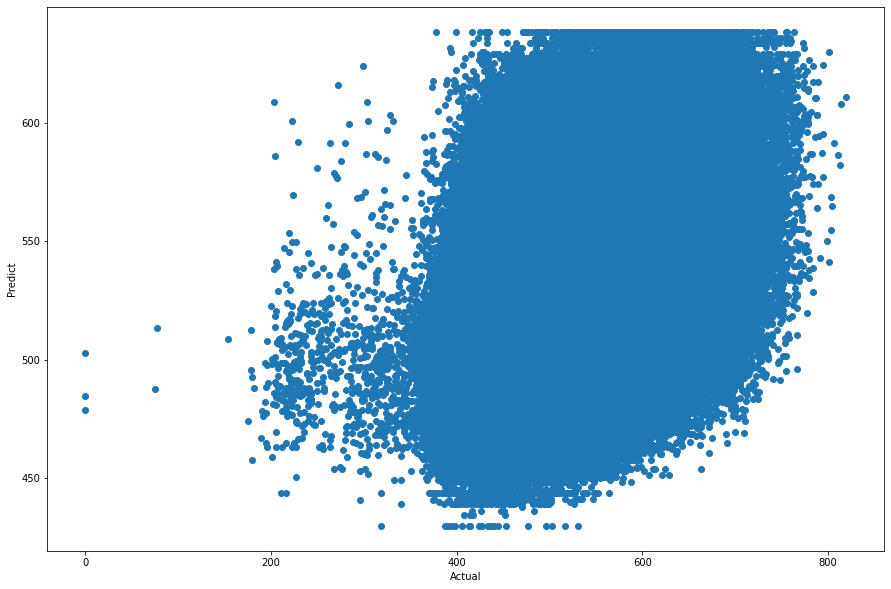

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predict')

In [ ]:
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats

X = x
y = y

linear_model = sm.OLS(y, X).fit()
print(linear_model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Media_Notas   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.054e+07
Date:                Tue, 23 Aug 2022   Prob (F-statistic):                        0.00
Time:                        17:55:25   Log-Likelihood:                     -2.1068e+07
No. Observations:             3762369   AIC:                                  4.214e+07
Df Residuals:                 3762347   BIC:                                  4.214e+07
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [ ]:
import shap
from sklearn.feature_extraction.text import TfidfVectorizer


shap.initjs()

#x_train,x_test,y_train,y_test
#explainer = shap.LinearExplainer(ml,x_train)
#shap_values = explainer.shap_values(x_test)

In [ ]:
indices = dummy.columns
explainer = shap.Explainer(ml, x_train, feature_names=indices)
shap_values = explainer(x_test)

Linear explainer: 1128712it [00:17, 25320.68it/s]                             


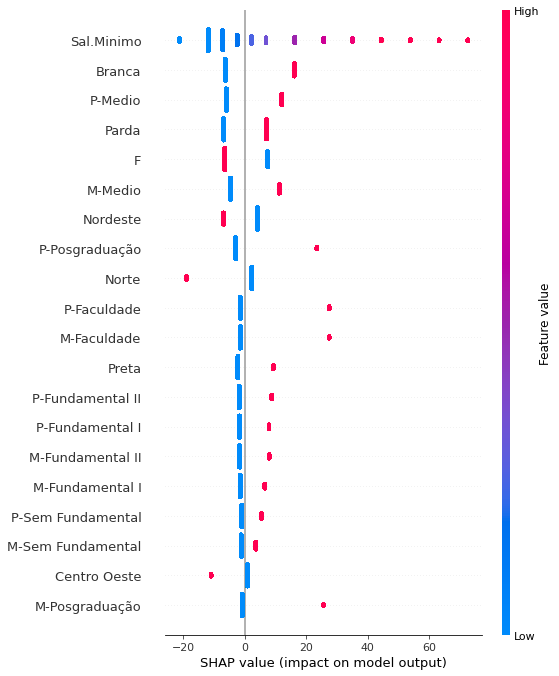

In [ ]:
X_test_array = x_test
shap.summary_plot(shap_values, X_test_array)

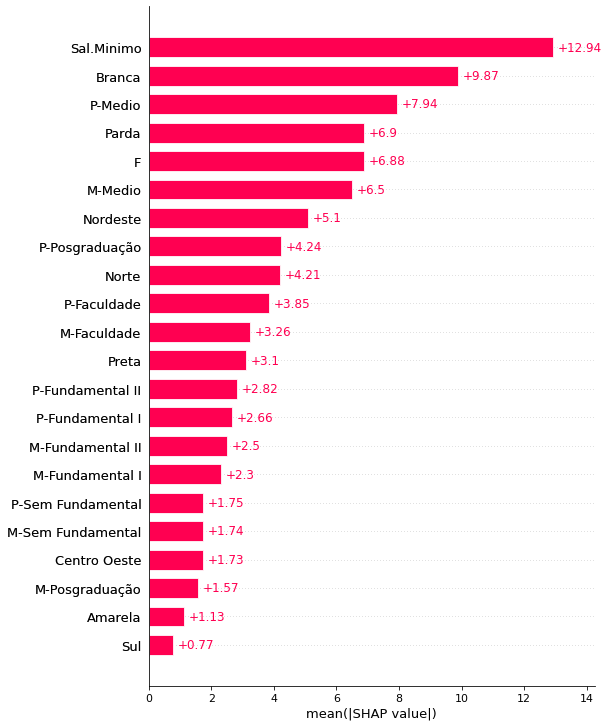

In [ ]:
shap.initjs()
shap.plots.bar(shap_values,max_display=22)

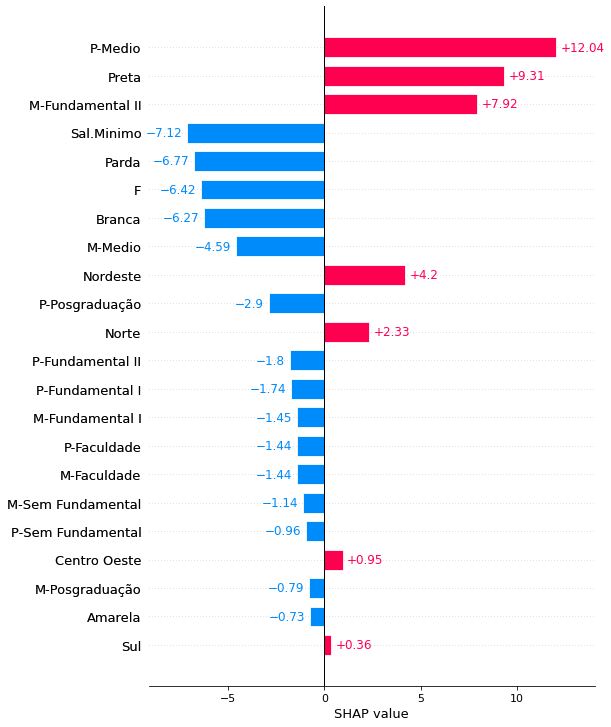

In [ ]:
#Testando
shap.plots.bar(shap_values[0],max_display=22)

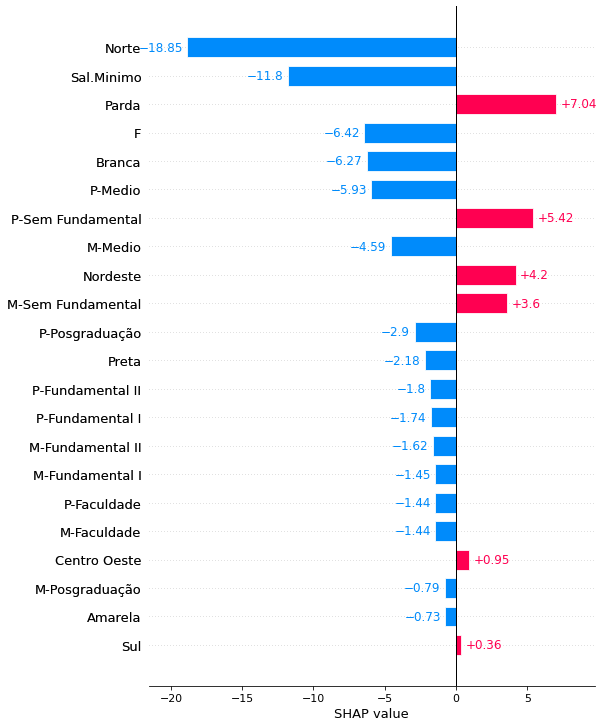

In [ ]:
shap.plots.bar(shap_values[35],max_display=22)

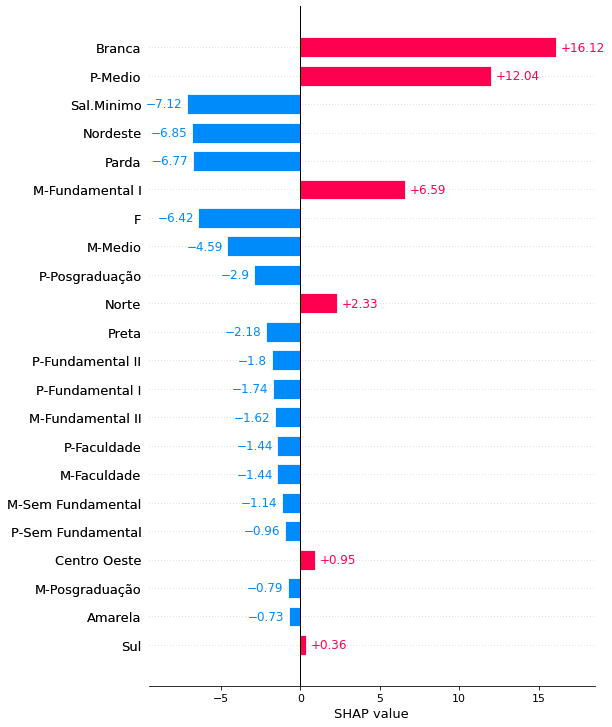

In [ ]:
shap.plots.bar(shap_values[24],max_display=22)